<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


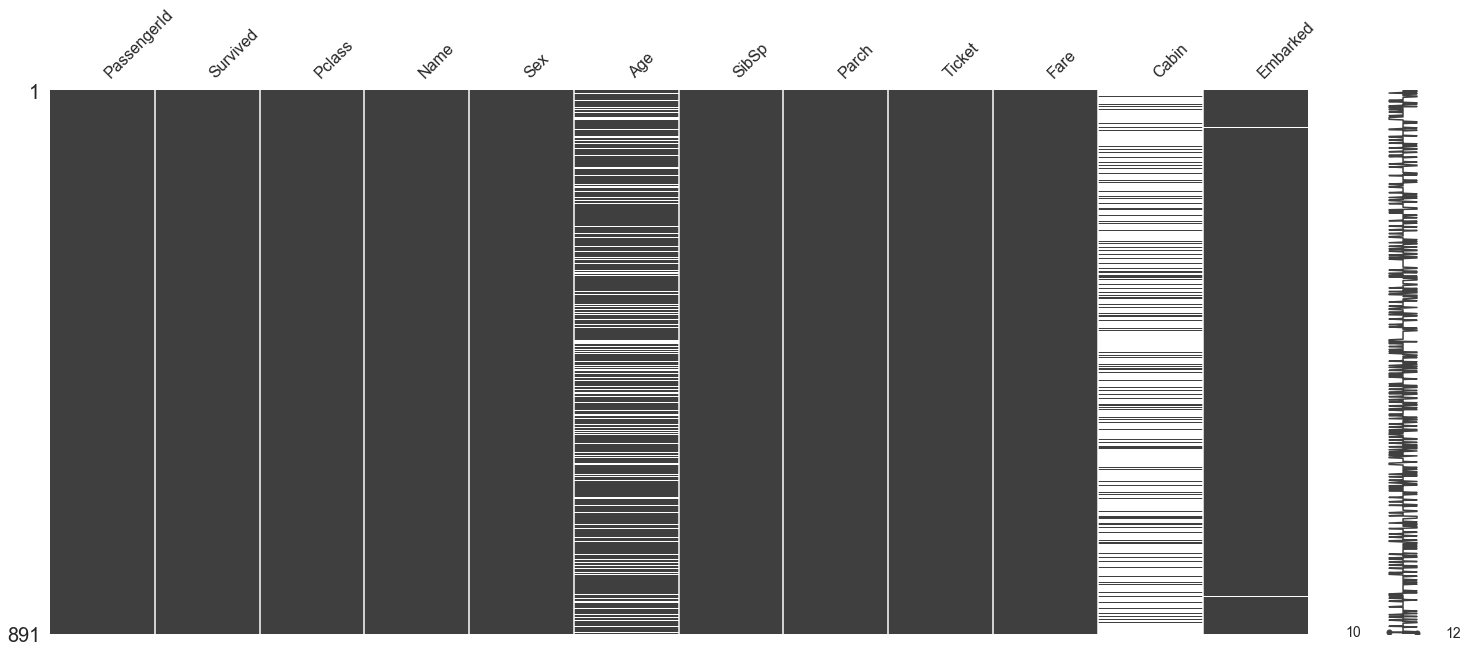

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#판다스를 쓰는데, 경로만 입력하면 csv파일을 read 할 수 있다.
data_train=pd.read_csv('../Kaggle_Titanic/2019-1st-ml-month-with-kakr/train.csv')
data_test=pd.read_csv('../Kaggle_titanic/2019-1st-ml-month-with-kakr/test.csv')

data_train.info() #pandas는 데이터의 분석을 용이하게 하는 기능이 많은데, info()는 그 주요 기능 중 하나이다.
data_train.head()

import missingno as msno

msno.matrix(data_train)
plt.show()
#흰색 줄은 결측치를 의미한다.

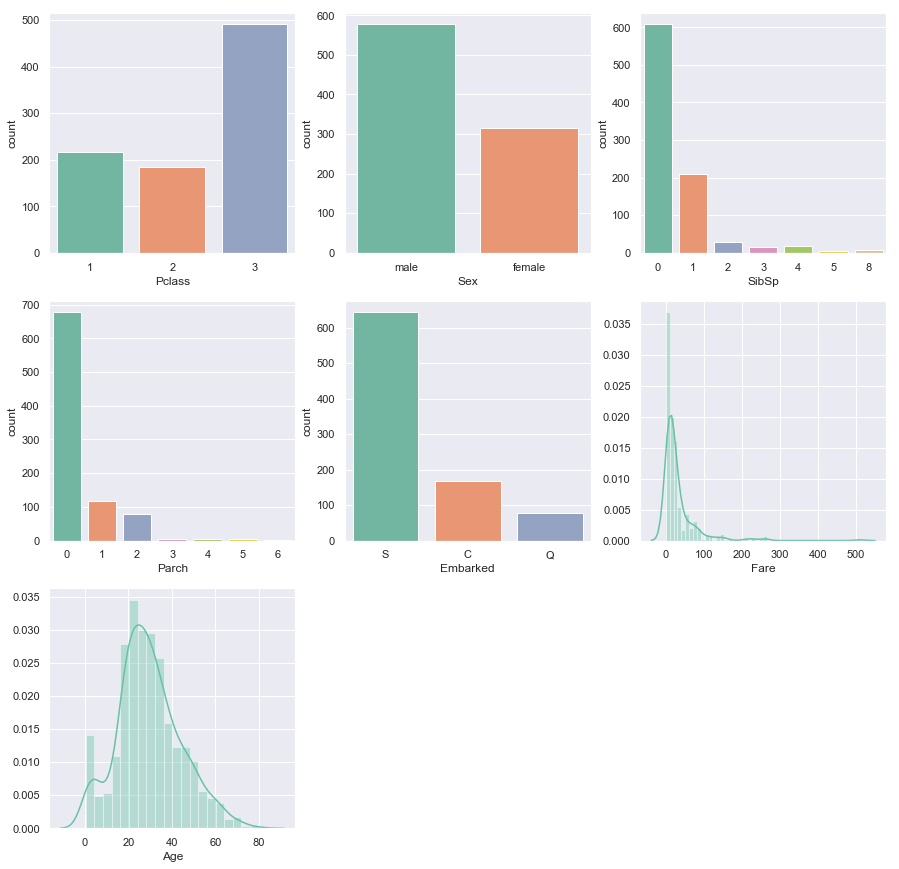

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'), (891, 12))

In [13]:

'''
###################################################
Univariate 분석 // 다변수 분석  # seaborn을 이용하면 엄청 편리하게 데이터 분석을 할 수 있다!
###################################################
'''

import seaborn as sns
# 범주형 / 연속형 데이터 분류
categ = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
conti = ['Fare', 'Age']

sns.set(color_codes=True)
pal = sns.color_palette("Set2", 10)
sns.set_palette(pal)

# 분포
fig = plt.figure(figsize=(15, 15))

for i in range(0, len(categ)): #i는 0,1,2,3,4
    fig.add_subplot(3, 3, i + 1)
    sns.countplot(x=categ[i], data=data_train)

for col in conti:
    fig.add_subplot(3, 3, i + 2)
    sns.distplot(data_train[col].dropna()) #dropna()는 특정 행 또는 열을 대상으로 결측 값이 들어있으면 제거한다.
    i = i + 1
plt.show()

data_train.columns, data_train.shape #이게 뭘 해주는거지??

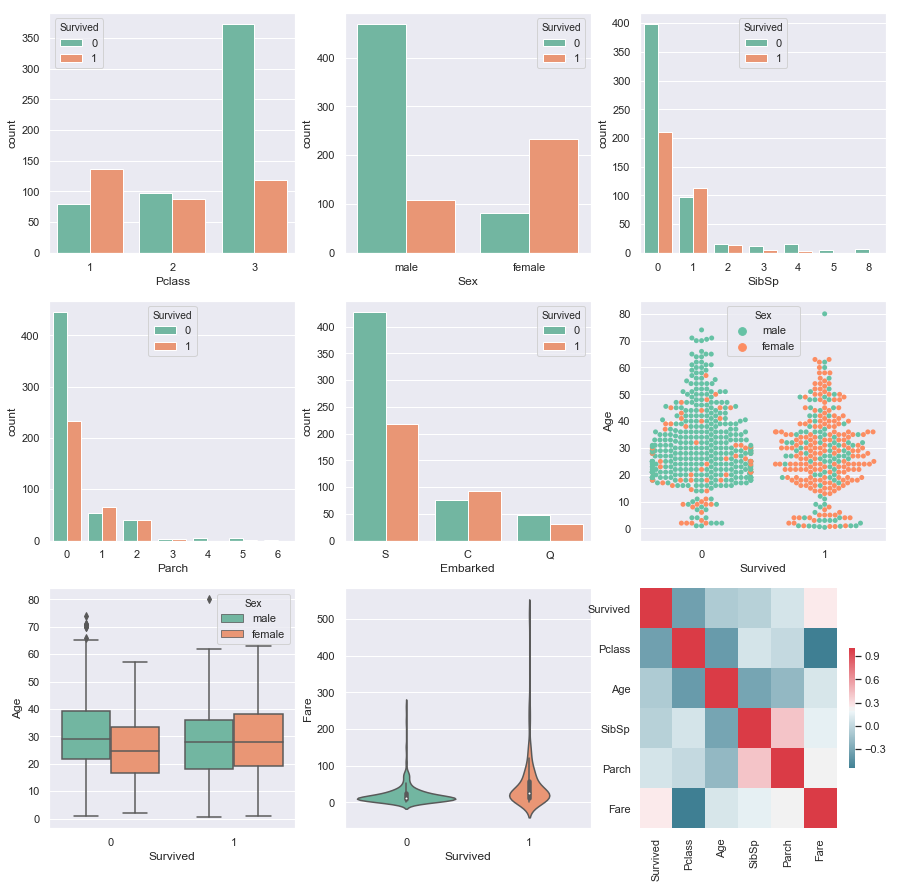

In [14]:

'''
###################################################
Bivariate 분석 // 이변수(?) 분석
###################################################
'''

fig = plt.figure(figsize=(15,15))
i=1
for col in categ:
    if col != 'Survived':
        fig.add_subplot(3,3,i)
        sns.countplot(x=col,hue='Survived',data=data_train)
        i=i+1

fig.add_subplot(3,3,6)
sns.swarmplot(x='Survived',y="Age",hue='Sex',data=data_train)
fig.add_subplot(3,3,7)
sns.boxplot(x='Survived',y='Age',hue='Sex',data=data_train)
fig.add_subplot(3,3,8)
sns.violinplot(x='Survived',y='Fare',data=data_train)



corr=data_train.drop(['PassengerId'],axis=1).corr() #PassengerId column을 버리고, correlation을 구함.
mask=np.zeros_like(corr,dtype=np.bool) #Return an array of zeros with the same shape and type as a given array.
#mask[np.triu_indices_from(mask)]=True #이걸 해주면 correlation matrix를 반만 볼 수 있음
cmap=sns.diverging_palette(220, 10, as_cmap=True) #컬러맵 설정
fig.add_subplot(3,3,9)
sns.heatmap(corr,mask=mask,cmap=cmap,cbar_kws={"shrink":.5}) #cbar_kws는 컬러바(범례) 사이즈 조정하는 부분


plt.show()


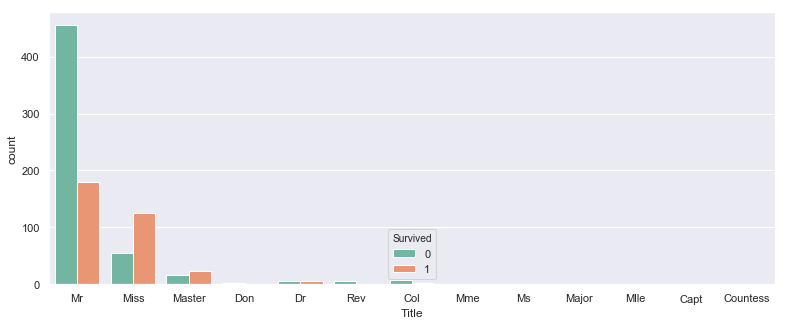

In [15]:

'''
###################################################
Feature Engineering
###################################################
'''



# 새로운 변수 추가하여 효과보기

title = ['Mlle','Mrs', 'Mr', 'Miss','Master','Don','Rev','Dr','Mme','Ms','Major','Col','Capt','Countess']

# 입력으로 name을 넣고, 출력으로 title을 얻는 함수
def ExtractTitle(name):

    tit = 'missing'
    for item in title:
        if item in name:
            tit = item
    if tit == 'missing':
        tit = 'Mr'
    return tit

data_train['Title']=data_train.apply(lambda row: ExtractTitle(row["Name"]),axis=1)
#apply 함수는 pandas에서 제공하는 매우 유용한 함수
plt.figure(figsize=(13,5))
fig.add_subplot(2,1,1)
sns.countplot(x='Title',data=data_train, hue='Survived')
plt.show()



In [16]:

'''
###################################################
전처리 마무리하기
###################################################
'''
#Age
MedianAge=data_train.Age.median() #Age 결측치는 median으로 대체
data_train.Age=data_train.Age.fillna(value=MedianAge)

#Embarked
ModeEmbarked=data_train.Embarked.mode()[0] #Embarked 결측치는 최빈 값으로 대체
data_train.Embarked=data_train.Embarked.fillna(value=ModeEmbarked)

#Fare
MedianFare=data_train.Fare.median()
data_train.Fare=data_train.Fare.fillna(value=MedianFare)

##더미변수화 하기
data_train['Cabin']=data_train.apply(lambda x:"No" if pd.isnull(x['Cabin']) else "Yes",axis=1)
data_train=pd.get_dummies(data_train,drop_first=True,columns=['Sex','Title','Cabin','Embarked'])


from sklearn.preprocessing import StandardScaler
##수치형 변수들 스케일링 해주기 - Standardization 표준화
scale = StandardScaler().fit(data_train[['Age','Fare']])
data_train[['Age','Fare']]=scale.transform(data_train[['Age','Fare']])
### 전처리 끝 ###


In [6]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev,Cabin_Yes,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.565736,1,0,A/5 21171,-0.502445,1,...,0,0,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,1,0,PC 17599,0.786845,0,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",-0.258337,0,0,STON/O2. 3101282,-0.488854,0,...,0,1,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,1,0,113803,0.420730,0,...,0,0,0,0,1,0,0,1,0,1
4,5,0,3,"Allen, Mr. William Henry",0.433312,0,0,373450,-0.486337,1,...,0,0,0,0,1,0,0,0,0,1
5,6,0,3,"Moran, Mr. James",-0.104637,0,0,330877,-0.478116,1,...,0,0,0,0,1,0,0,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1.893459,0,0,17463,0.395814,1,...,0,0,0,0,1,0,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",-2.102733,3,1,349909,-0.224083,1,...,1,0,0,0,0,0,0,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",-0.181487,0,2,347742,-0.424256,0,...,0,0,0,0,1,0,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",-1.180535,1,0,237736,-0.042956,0,...,0,0,0,0,1,0,0,0,0,0
